In [20]:
from sola.main_classes import domains
from sola.main_classes import functions
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import time
from line_profiler import LineProfiler
import sys

In [21]:
domain = domains.HyperParalelipiped([[0, 1]])
print('a')

a


In [22]:
centers = np.linspace(0, 1, 100)
widths = np.linspace(0.1, 0.5, 100)
how_many = len(centers)

In [23]:
targets = [functions.Gaussian_1D(domain=domain, center=center, width=width) for (center, width) in zip(centers, widths)]

Elapsed time:  0.4978797435760498


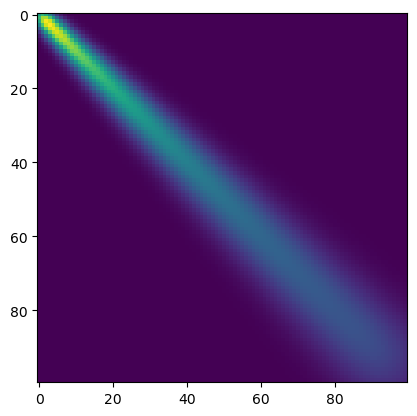

In [24]:
%matplotlib inline
result = np.zeros((len(targets), len(targets)))
start_time = time.time()
for i, target1 in enumerate(targets):
    for j, target2 in enumerate(targets):
        result[i, j] = integrate.simpson((target1*target2).evaluate(domain.mesh), domain.mesh)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)
plt.imshow(result)
plt.show()


In [25]:
sensitivities = []
for index in range(how_many):
    if i in [0, 2]:
        sensitivities.append(functions.NormalModes_1D(domain=domain, order=3, spread=0.05,
                                                    max_freq=10, seed=index + i*how_many))
    else:
        sensitivities.append(functions.NormalModes_1D(domain=domain, order=3, spread=0.05,
                                                    max_freq=10, seed=index + i*how_many,
                                                    no_sensitivity_regions=[[0.5, 0.75]]))

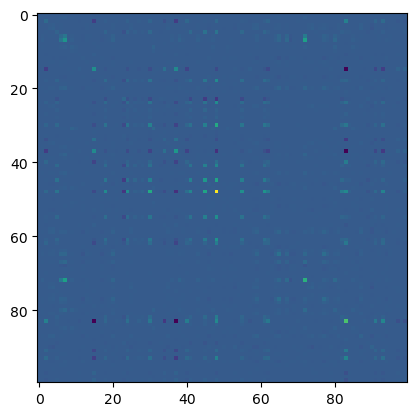

In [26]:
%matplotlib inline
profiler = LineProfiler()
profiler.add_function(functions.NormalModes_1D.evaluate)
result_2 = np.zeros((len(sensitivities), len(sensitivities)))
profiler.enable()
for i, target1 in enumerate(sensitivities):
    for j, target2 in enumerate(sensitivities):
        result_2[i, j] = integrate.simpson((target1*target2).evaluate(domain.mesh), domain.mesh)
profiler.disable()
end_time = time.time()
plt.imshow(result_2)
plt.show()


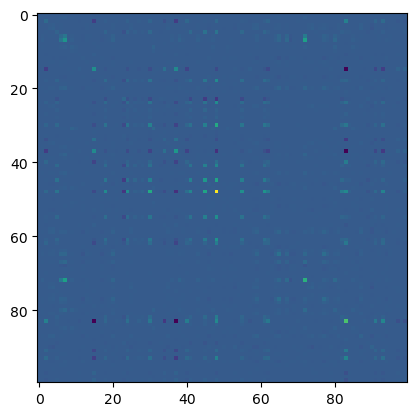

In [27]:
from multiprocessing import Pool

result_3 = np.zeros((how_many, how_many))
def compute_pairwise(i, j):
    return i, j, integrate.simpson((sensitivities[i]*sensitivities[j]).evaluate(domain.mesh), domain.mesh)

with Pool() as p:
    entries = p.starmap(compute_pairwise, [(i, j) for i in range(how_many) for j in range(how_many)])
for entry in entries:
    i, j, value = entry
    result_3[i, j] = value

plt.imshow(result_2)
plt.show()

In [28]:
print(elapsed_time)

0.4978797435760498
